In [66]:
# #!/bin/bash
# !curl -L -o ./credit-score-classification.zip\
#   https://www.kaggle.com/api/v1/datasets/download/parisrohan/credit-score-classification

In [67]:
%matplotlib inline

In [68]:
import pandas as pd
import numpy as np
from typing import Optional
from IPython.utils import io
import matplotlib.pyplot as plt

In [69]:
file_name = "train_raw.csv"
df = pd.read_csv(file_name)

/tmp/ipykernel_69408/4186681340.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [70]:
column_idx_with_issue = 26
column_name = df.columns[column_idx_with_issue]
column_name

'Monthly_Balance'

In [71]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [72]:
# create boolean mask of rows where the value is a Python string
mask = df[column_name].map(lambda x: isinstance(x, str))
df.loc[mask, column_name].head(5)

0    312.49408867943663
1    284.62916249607184
2     331.2098628537912
3    223.45130972736786
4    341.48923103222177
Name: Monthly_Balance, dtype: object

Find rows that cannot be parsed as numeric (useful if column should be numeric):

In [73]:
# re-read that column as strings to see raw values
raw = pd.read_csv(file_name, dtype=str, usecols=[column_name])
raw_vals = raw[column_name].dropna().head(200)
raw_vals.head(50)
# find values containing non-digit characters (excluding dot/minus)
import re
pattern = r'[^0-9\.\-]'
raw.loc[raw[column_name].str.contains(pattern, na=False), column_name].value_counts().head(50)

Monthly_Balance
__-333333333333333333333333333__    9
Name: count, dtype: int64

In [74]:
# value you found
bad_val = "__-333333333333333333333333333__"

# find how many and which row indices
mask = df[column_name] == bad_val
print("count:", mask.sum())
print("indices:", df.loc[mask].index.tolist())

# show the full rows for context
df.loc[mask].head(10)

count: 9
indices: [5545, 26177, 29158, 35570, 38622, 60009, 75251, 82918, 83255]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,0x367f,CUS_0x9885,February,Paul Dayl,17,186-49-9679,Developer,41086.4,3660.866667,3,...,Standard,113.98,34.826541,11 Years and 6 Months,Yes,145.544320,201.1429928919469,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Standard
26177,0xaf63,CUS_0x5a90,February,Scuffhamq,45,264-53-1943,Engineer,29728.31,2551.359167,3,...,Good,917.0,38.198076,31 Years and 9 Months,No,34.496445,198.6115126951797,Low_spent_Large_value_payments,__-333333333333333333333333333__,Good
29158,0xc0d8,CUS_0x288d,July,Selamk,55,970-19-8342,Lawyer,30748.93,2572.410833,1,...,Good,860.97,40.634250,19 Years and 5 Months,No,43.727774,79.07180674947499,High_spent_Small_value_payments,__-333333333333333333333333333__,Standard
35570,0xe66c,CUS_0x85e9,March,Anna Driveri,45,288-62-7562,_______,20929.295_,1704.107917,5,...,_,858.09,33.943626,21 Years and 7 Months,No,13798.000000,220.30455197823662,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
38622,0xf84c,CUS_0x2b77,July,Longstretho,21,006-36-0111,Doctor,15167.62,1471.968333,4,...,Good,847.03,28.541848,NaN,NM,9.930809,128.87587207680795,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
60009,0x1759f,CUS_0xc06e,February,radenp,30,046-72-5387,Journalist,92114.68,7811.223333,3,...,Standard,820.52,39.089475,20 Years and 10 Months,Yes,54.219664,NaN,High_spent_Large_value_payments,__-333333333333333333333333333__,Standard
75251,0x1ceed,CUS_0x57f3,April,Kristen Haysq,29,577-85-0830,Mechanic,60904.59,NaN,3,...,Standard,2441.47,29.878716,12 Years and 11 Months,Yes,61.525140,394.8939566733383,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
82918,0x1fbd8,CUS_0x41bf,July,Doeringq,44,693-64-7611,Journalist,61990.52,4900.876667,10,...,Bad,3618.91,37.718591,13 Years and 8 Months,NM,355.143396,194.28348839148083,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
83255,0x1fdd1,CUS_0x2f7e,August,Sabina Zawadzkif,31,109-48-2095,Doctor,126353.04,10635.420000,4,...,_,859.77,28.442867,31 Years and 9 Months,No,167.043910,549.7661392945339,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Poor


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [76]:
import pandas as pd

# Example schema
dtypes = {
    "Customer_ID": "string",
    "Month": "string",
    "Name": "string",
    "Age": "float64",
    "SSN": "string",
    "Occupation": "string",
    "Annual_Income": "float64",
    "Monthly_Inhand_Salary": "float64",
    "Num_Bank_Accounts": "int",
    "Num_Credit_Card": "int",
    "Interest_Rate": "float64",
    "Num_of_Loan": "int",
    "Type_of_Loan": "string",
    "Delay_from_due_date": "int",
    "Num_of_Delayed_Payment": "int",
    "Changed_Credit_Limit": "float64",
    "Num_Credit_Inquiries": "float64",
    "Credit_Mix": "string",
    "Outstanding_Debt": "float64",
    "Credit_Utilization_Ratio": "float64",
    "Credit_History_Age": "string",
    "Payment_of_Min_Amount": "string",
    "Total_EMI_per_month": "float64",
    "Amount_invested_monthly": "float64",
    "Payment_Behaviour": "string",
    "Monthly_Balance": "float64",
    "Credit_Score": "string"
}

# Read raw CSV
df = pd.read_csv(file_name)

# Apply schema with coercion
for col, typ in dtypes.items():
    if typ.startswith("float") or typ.startswith("int"):
        df[col] = pd.to_numeric(df[col], errors="coerce")  # invalid -> NaN
    elif typ == "string":
        df[col] = df[col].astype("string").replace(r"^\s*$", pd.NA, regex=True)


/tmp/ipykernel_69408/3223048264.py:35: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [77]:
df[::40005].T

,0,40005,80010
ID,0x1602,0x10067,0x1ead0
Customer_ID,CUS_0xd40,CUS_0x41be,CUS_0x7d5e
Month,January,June,March
Name,Aaron Maashoh,Selyukha,<NA>
Age,23.0,35.0,19.0
SSN,821-00-0265,700-01-5042,063-39-1383
Occupation,Scientist,Musician,Journalist
Annual_Income,19114.12,NaN,NaN
Monthly_Inhand_Salary,1824.843333,6093.61,2409.553333
Num_Bank_Accounts,3,7,6


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  string 
 2   Month                     100000 non-null  string 
 3   Name                      90015 non-null   string 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  string 
 6   Occupation                100000 non-null  string 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   st

In [79]:
df[::10000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.120,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
10000,0x509a,CUS_0x229f,January,all Davidt,45.0,547-53-2472,_______,20261.850,1598.487500,7,...,Bad,1300.71,34.779107,14 Years and 2 Months,Yes,96.409635,124.514960,Low_spent_Small_value_payments,228.924155,Poor
20000,0x8b32,CUS_0x10c0,January,Scheyderx,38.0,658-53-1756,Architect,49454.130,4328.177500,8,...,Bad,1388.56,34.322164,12 Years and 9 Months,Yes,73.346359,304.051202,!@9#%8,345.420189,Standard
30000,0xc5ca,CUS_0x236b,January,Martinneo,25.0,575-63-7039,Manager,18393.510,1742.792500,9,...,_,2604.09,29.119227,4 Years and 3 Months,Yes,62.204931,233.032353,Low_spent_Small_value_payments,169.041966,Standard
40000,0x10062,CUS_0x41be,January,Selyukha,35.0,700-01-5042,Musician,72583.320,6093.610000,7,...,Standard,1019.44,37.220639,18 Years and 2 Months,Yes,104.016730,334.484535,Low_spent_Medium_value_payments,450.859735,Standard
50000,0x13afa,CUS_0x2646,January,ewich Billk,45.0,261-90-8736,Journalist,7807.285,606.607083,4,...,Standard,692.63,26.650258,<NA>,Yes,7.771075,31.082811,Low_spent_Small_value_payments,311.806822,Standard
60000,0x17592,CUS_0xa505,January,Jonathan Stempelz,41.0,959-35-8150,Engineer,34899.220,2764.268333,10,...,Standard,2103.76,30.962745,7 Years and 8 Months,Yes,78.967677,110.466661,Low_spent_Small_value_payments,376.992495,Poor
70000,0x1b02a,CUS_0x1d1b,January,Araxiac,20.0,#F%$D@*&8,Manager,152574.760,12547.563333,2,...,Good,NaN,38.632872,20 Years and 1 Months,No,205.484843,974.560691,Low_spent_Small_value_payments,364.710799,Standard
80000,0x1eac2,CUS_0x9df0,January,Timk,1642.0,846-31-4164,Entrepreneur,36115.920,2716.660000,0,...,_,886.95,27.797266,22 Years and 9 Months,No,78.052255,96.001442,High_spent_Small_value_payments,357.612303,Good
90000,0x2255a,CUS_0x3787,January,Kajimotoz,52.0,986-71-6476,Engineer,21270.790,1485.565833,6,...,Standard,782.15,39.263213,16 Years and 9 Months,Yes,48.481182,63.795843,High_spent_Small_value_payments,296.279558,Standard


### Convert column names to lower case

In [80]:
df.columns = df.columns.str.lower()

### Display unique values to analyze data

In [81]:
from IPython.display import display
def print_column_unique_values():
    for col in df.columns:
        print(f"Column Name: {col}, Unique count: {df[col].nunique()}")
        print(df[col].unique())
        print("-" * 20)

In [82]:
with io.capture_output() as captured:
    print_column_unique_values()

captured_output_text = captured.stdout
captured_output_text

"Column Name: id, Unique count: 100000\n['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']\n--------------------\nColumn Name: customer_id, Unique count: 12500\n<StringArray>\n[ 'CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x1cdb',\n 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407', 'CUS_0x4157', 'CUS_0xba08',\n ...\n 'CUS_0x2654', 'CUS_0xb11c', 'CUS_0xad4f', 'CUS_0x51b3', 'CUS_0x2084',\n 'CUS_0x372c',  'CUS_0xf16', 'CUS_0xaf61', 'CUS_0x8600', 'CUS_0x942c']\nLength: 12500, dtype: string\n--------------------\nColumn Name: month, Unique count: 8\n<StringArray>\n['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']\nLength: 8, dtype: string\n--------------------\nColumn Name: name, Unique count: 10139\n<StringArray>\n[   'Aaron Maashoh',               <NA>,  'Rick Rothackerj',\n           'Langep',           'Jasond',           'Deepaa',\n               'Np',           'Nadiaq',             'Annk',\n     'Charlie Zhur',\n ...\n  'Rick Rothackeru', 

In [83]:
df.head(2)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,<NA>,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good


In [84]:
def display_hist(column_name, title):
    x = df[column_name].dropna().values

    # downsample if needed
    # step = max(1, len(x) // 100000)
    # x = x[::step]

    plt.figure(figsize=(10, 4))
    plt.hist(x, bins=50, color="steelblue", edgecolor="black")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()

### Rename the column `Id`

In [85]:
df["row_id"] = df["id"]
df = df.drop(["id"], axis=1, errors="ignore")

In [86]:
df.head()

,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,row_id
0,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,0x1602
1,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,809.98,31.944960,<NA>,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0x1603
2,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,0x1604
3,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,0x1605
4,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,0x1606


### Drop identifiers and columns that do not contain predictive information

In [87]:
df = df.drop(["customer_id", "ssn", "name"], axis=1, errors="ignore")

### Implement one-hot encoding for the column `type_of_loan`

#### Analyze a number of unique values in the `type_of_loan` column

In [88]:
df["type_of_loan"].hasnans

True

In [89]:
loan_types = set()

for val in df["type_of_loan"]:
    if pd.isna(val):
        continue

    normalized = val.replace(" and", ", ")
    types = normalized.split(",")
    for type in types:
        if type.strip() == "":
            continue
        loan_types.add(type.strip())

print(loan_types)
print(len(loan_types))

{'Home Equity Loan', 'Student Loan', 'Credit-Builder Loan', 'Auto Loan', 'Mortgage Loan', 'Payday Loan', 'Not Specified', 'Debt Consolidation Loan', 'Personal Loan'}
9


#### Apply one-hot encoding

In [90]:
def apply_one_hot_encoding_to_type_of_loan():
    if "type_of_loan" not in df.columns:
        print("`type_of_loan` has already been removed")
        return

    for loan in sorted(loan_types):
        column_name = f"has_{loan.lower().replace(" ", "_").replace("-", "_")}"
        df[column_name] = df["type_of_loan"].apply(
            lambda s: 1 if pd.notna(s) and loan in s else 0
        ).astype("int8")

In [91]:
apply_one_hot_encoding_to_type_of_loan()

In [92]:
df = df.drop(["type_of_loan"], axis=1, errors="ignore")

In [93]:
df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,row_id,has_auto_loan,has_credit_builder_loan,has_debt_consolidation_loan,has_home_equity_loan,has_mortgage_loan,has_not_specified,has_payday_loan,has_personal_loan,has_student_loan
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,0x1602,1,1,0,1,0,0,0,1,0
1,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,-1,...,0x1603,1,1,0,1,0,0,0,1,0
2,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,3,...,0x1604,1,1,0,1,0,0,0,1,0
3,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,5,...,0x1605,1,1,0,1,0,0,0,1,0
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,0x1606,1,1,0,1,0,0,0,1,0


### Cleanup the column `occupation`

In [94]:
df["occupation"] = df["occupation"].replace("_______", "Unknown")
df["occupation"].unique()

<StringArray>
[    'Scientist',       'Unknown',       'Teacher',      'Engineer',
  'Entrepreneur',     'Developer',        'Lawyer', 'Media_Manager',
        'Doctor',    'Journalist',       'Manager',    'Accountant',
      'Musician',      'Mechanic',        'Writer',     'Architect']
Length: 16, dtype: string

### Cleanup the column `credit_mix`

In [95]:
df["credit_mix"] = df["credit_mix"].replace("_", "Unknown")

In [96]:
df["credit_mix"].unique()

<StringArray>
['Unknown', 'Good', 'Standard', 'Bad']
Length: 4, dtype: string

In [97]:
df["credit_mix"].value_counts()

credit_mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: Int64

### Data Transformation Note: `Credit_History_Age` Column

**Original format:** `"X Years and Y Months"` (string)
- Example: `"22 Years and 1 Months"`, `"0 Years and 11 Months"`
- Total unique values: 404
- Data type: String (not suitable for modeling)

**Problem:**
- Non-numeric format prevents mathematical operations
- Cannot be used directly in ML models
- Inconsistent scale (years vs months)

**Solution:** Convert to numeric total months

**Transformation applied:**
```
"X Years and Y Months" → (X × 12) + Y months
```

**Examples:**
- `"22 Years and 1 Months"` → 265 months
- `"0 Years and 11 Months"` → 11 months
- `"1 Years and 0 Months"` → 12 months

**New column:** `credit_history_months` (Int32, nullable)
- Preserves ordering and scale
- Suitable for distance-based and linear models
- Missing values retained as `<NA>`

In [98]:
def convert_string_to_months(str: str) -> Optional[int]:
    if pd.isna(str):
        return pd.NA

    values = str.split(" and ")
    years = int(values[0].split(" Years")[0])
    months = int(values[1].split(" Months")[0])

    return years * 12 + months

In [99]:
df["credit_history_months"] = df["credit_history_age"].apply(
    lambda s: convert_string_to_months(s)
).astype("Int16")

In [100]:
df["credit_history_months"].dtype

Int16Dtype()

In [101]:
median = df["credit_history_months"].median()
df["credit_history_months"] = df["credit_history_months"].fillna(median)

In [102]:
df = df.drop(["credit_history_age"], axis=1, errors="ignore")

In [103]:
df["credit_history_months"].describe()

count     100000.0
mean     220.99716
std      95.133546
min            1.0
25%          154.0
50%          219.0
75%          292.0
max          404.0
Name: credit_history_months, dtype: Float64

In [104]:
df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,has_auto_loan,has_credit_builder_loan,has_debt_consolidation_loan,has_home_equity_loan,has_mortgage_loan,has_not_specified,has_payday_loan,has_personal_loan,has_student_loan,credit_history_months
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,1,1,0,1,0,0,0,1,0,265
1,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,-1,...,1,1,0,1,0,0,0,1,0,219
2,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,3,...,1,1,0,1,0,0,0,1,0,267
3,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,5,...,1,1,0,1,0,0,0,1,0,268
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,1,1,0,1,0,0,0,1,0,269


### Cleaning up the column `payment_of_min_amount`

Interpretation:
`payment_of_min_amount` indicates whether the customer usually pays at least the minimum amount due.

* **Yes (52%)** — customer pays at least the minimum.
* **No (36%)** — customer doesn’t pay it.
* **NM (12%)** — likely means “Not Mentioned” or missing.

Action:
Replace `"NM"` with `NaN` to handle it as missing:

```python
df["payment_of_min_amount"] = df["payment_of_min_amount"].replace("NM", pd.NA)
```

Then decide how to impute:

* If the column correlates with default risk, consider encoding `"Yes"=1`, `"No"=0`.
* Missing values can be filled with a new category `"Unknown"` or by mode (`Yes`).


In [105]:
df["payment_of_min_amount"] = df["payment_of_min_amount"].replace("NM", pd.NA)
df["payment_of_min_amount"].unique()

<StringArray>
['No', <NA>, 'Yes']
Length: 3, dtype: string

In [106]:
df["payment_of_min_amount"].describe()

count     87993
unique        2
top         Yes
freq      52326
Name: payment_of_min_amount, dtype: object

In [107]:
df["payment_of_min_amount"].value_counts()

payment_of_min_amount
Yes    52326
No     35667
Name: count, dtype: Int64

`total_emi_per_month` = total monthly loan payments (EMIs)

In [108]:
df["total_emi_per_month"].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: total_emi_per_month, dtype: float64

In [109]:
df["total_emi_per_month"].value_counts()

total_emi_per_month
0.000000        10613
135.133799          8
182.585183          8
427.144183          8
83.829111           8
                ...  
33746.000000        1
39347.000000        1
27292.000000        1
16627.000000        1
49430.000000        1
Name: count, Length: 14950, dtype: int64

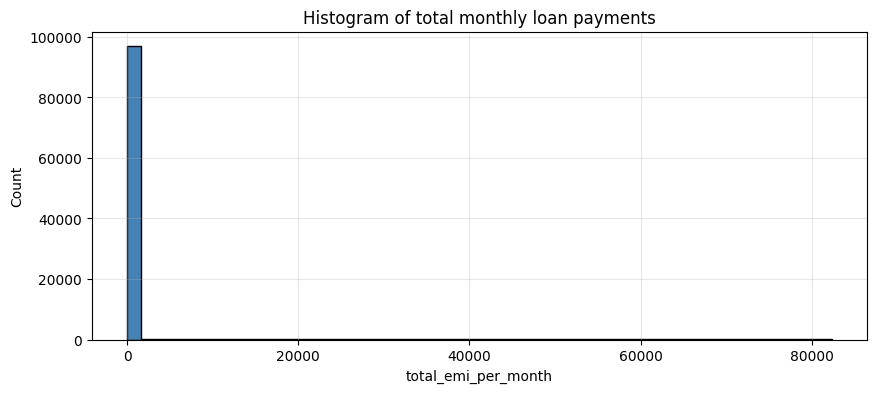

In [110]:
display_hist("total_emi_per_month", "Histogram of total monthly loan payments")

In [111]:
upper = df["total_emi_per_month"].quantile(0.99)
df["total_emi_per_month"] = np.where(df["total_emi_per_month"] > upper, upper, df["total_emi_per_month"])


In [112]:
df["total_emi_per_month"].describe()

count    100000.000000
mean       1273.860507
std        7251.373443
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       56125.300000
Name: total_emi_per_month, dtype: float64

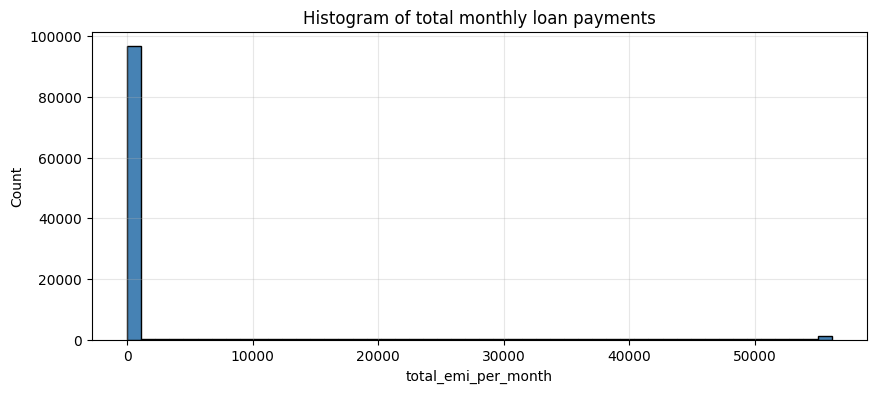

In [113]:
display_hist("total_emi_per_month", "Histogram of total monthly loan payments")

### Data Cleaning Note: `payment_behaviour` Column

**Original values:** 7 unique categories
- Valid categories (6): Follow pattern `{Spending_Level}_{Value_Size}_payments`
  - `High_spent_Small_value_payments`
  - `High_spent_Medium_value_payments`
  - `High_spent_Large_value_payments`
  - `Low_spent_Small_value_payments`
  - `Low_spent_Medium_value_payments`
  - `Low_spent_Large_value_payments`
- Invalid value (1): `'!@9#%8'` (7.6% of records)

**Pattern interpretation:**

The `{Spending_Level}_{Value_Size}_payments` format captures two behavioral dimensions:

1. **`Spending_Level`** (High/Low): Total amount spent across all transactions
2. **`Value_Size`** (Small/Medium/Large): Average size of individual transactions

**Examples:**
- `High_spent_Small_value_payments`: Many small transactions totaling high spend (e.g., 100 × $50 = $5,000)
- `Low_spent_Large_value_payments`: Few large transactions totaling low spend (e.g., 2 × $500 = $1,000)

**Problem:**
- `'!@9#%8'` is a corrupted placeholder value (similar to `'_______'`, `'_'`, `'#F%$D@*&8'` seen in other columns)
- Represents 7,600 rows with missing payment behavior data
- Not a valid behavioral category

**Action:** Replace `'!@9#%8'` with `pd.NA`

**Justification:**
- Invalid token indicates data corruption, not a meaningful category
- Consistent with data quality cleanup approach for other columns
- Missing values can be handled during model preprocessing (imputation or dedicated handling)

**Credit risk insight:**
This feature provides valuable behavioral signals:
- High frequency small payments may indicate stable, regular income
- Large infrequent payments may suggest different financial management styles
- Captures spending patterns beyond simple transaction amounts

In [114]:
(df["payment_behaviour"] == "!@9#%8").sum() / len(df) * 100

np.float64(7.6)

In [115]:
df["payment_behaviour"] = df["payment_behaviour"].replace("!@9#%8", pd.NA)

In [116]:
payment_behavior_values = set()

for val in df["payment_behaviour"]:
    if pd.isna(val) is True:
        continue

    parts = val.lower().split("_payments")
    payment_behavior_values.add(parts[0])

payment_behavior_values

{'high_spent_large_value',
 'high_spent_medium_value',
 'high_spent_small_value',
 'low_spent_large_value',
 'low_spent_medium_value',
 'low_spent_small_value'}

In [117]:
for payment_behavior_value in payment_behavior_values:
    column_name = f"payment_behavior_{payment_behavior_value}"

    df[column_name] = df["payment_behaviour"].apply(
        lambda value: 1 if pd.notna(value) and payment_behavior_value in value.lower() else 0
    )

In [118]:
df = df.drop(["payment_behaviour"], axis=1, errors="ignore")

In [119]:
df.head(1).T

,0
month,January
age,23.0
occupation,Scientist
annual_income,19114.12
monthly_inhand_salary,1824.843333
num_bank_accounts,3
num_credit_card,4
interest_rate,3
num_of_loan,4.0
delay_from_due_date,3


In [120]:
df[df["num_of_delayed_payment"] < 0]["num_of_delayed_payment"].value_counts()

num_of_delayed_payment
-1.0    308
-2.0    223
-3.0     91
Name: count, dtype: int64

In [121]:
df[df["num_of_delayed_payment"] == -1].head(2).T

,10,698
month,March,March
age,28.0,28.0
occupation,Teacher,Mechanic
annual_income,NaN,15398.95
monthly_inhand_salary,3037.986667,NaN
num_bank_accounts,2,1
num_credit_card,1385,7
interest_rate,6,5
num_of_loan,1.0,4.0
delay_from_due_date,3,1


### Data Cleaning Note: `num_of_delayed_payment` Column

**Problem:**
- Found negative values: `-1` (308 rows), `-2` (223 rows), `-3` (91 rows)
- Total: 622 rows (0.6% of data)
- Semantically invalid: Cannot have negative count of delayed payments

**Action:** Replace negative values with `pd.NA`

**Justification:**
- Negative values are placeholder indicators for missing data
- Consistent with cleanup approach for other columns
- Valid range: 0 or positive integers only

In [122]:
df.loc[df["num_of_delayed_payment"] < 0, "num_of_delayed_payment"] = pd.NA
df["num_of_delayed_payment"].unique()

array([7.000e+00,       nan, 4.000e+00, 6.000e+00, 1.000e+00, 0.000e+00,
       8.000e+00, 5.000e+00, 3.000e+00, 9.000e+00, 1.200e+01, 1.500e+01,
       1.700e+01, 1.000e+01, 2.000e+00, 1.100e+01, 1.400e+01, 2.000e+01,
       2.200e+01, 1.300e+01, 1.600e+01, 1.800e+01, 1.900e+01, 2.300e+01,
       2.400e+01, 2.100e+01, 3.318e+03, 3.083e+03, 1.338e+03, 2.600e+01,
       3.104e+03, 2.500e+01, 1.106e+03, 8.340e+02, 2.672e+03, 2.008e+03,
       5.380e+02, 2.700e+01, 3.478e+03, 2.420e+03, 7.070e+02, 7.080e+02,
       3.815e+03, 2.800e+01, 1.867e+03, 2.250e+03, 1.463e+03, 4.126e+03,
       2.882e+03, 1.941e+03, 2.655e+03, 2.628e+03, 1.320e+02, 3.069e+03,
       3.060e+02, 3.539e+03, 3.684e+03, 1.823e+03, 4.128e+03, 1.946e+03,
       8.270e+02, 2.297e+03, 2.566e+03, 9.040e+02, 1.820e+02, 9.290e+02,
       3.568e+03, 2.503e+03, 1.552e+03, 2.812e+03, 1.697e+03, 3.764e+03,
       8.510e+02, 3.905e+03, 9.230e+02, 8.800e+01, 1.668e+03, 3.253e+03,
       8.080e+02, 2.689e+03, 3.858e+03, 6.420e+02, 

### Data Cleaning Note: `age` Column

Age is numeric and can be predictive. Handling missing values depends on distribution and outliers.

Check distribution: if symmetric, mean is fine.
If skewed or contains outliers, median is safer.

Given your data (18–70), ages are not extremely skewed but have outliers (70). Median imputation is generally safer for robustness.

Optional enhancement: create an “Age Group” categorical feature (e.g., 18–25, 26–35, etc.) after imputing. This can help tree-based models.

In [123]:
df["age"] =df["age"].clip(18, 70)
df.loc[(df["age"] < 18) | (df["age"] > 70), "age"]

Series([], Name: age, dtype: float64)

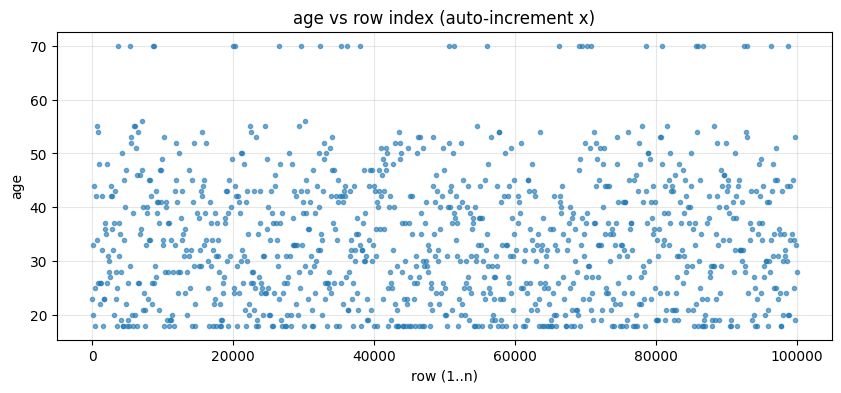

In [124]:
import numpy as np
# y values (age column)
y = df["age"].values

# x as auto-increment 1,2,3,...
x = np.arange(1, len(y) + 1)

# downsample for speed if dataset is large
step = max(1, len(df) // 1100)
x = x[::step]
y = y[::step]

plt.figure(figsize=(10, 4))
plt.plot(x, y, ".", alpha=0.6)
plt.xlabel("row (1..n)")
plt.ylabel("age")
plt.title("age vs row index (auto-increment x)")
plt.grid(alpha=0.3)
plt.show()

Using the mean could pull imputed values upward, making them unrealistic for most customers.

Recommendation: Use median to fill NaN (robust to skew and gaps).

In [125]:
age_median = df["age"].median()

In [126]:
df["age"] = df["age"].fillna(age_median)

### Data Cleaning Note: `annual_income` Column

The column is heavily right-skewed. A few extreme outliers (max ≈ 24 million) inflate the mean.

Best practice:
- Impute missing values with the median, not the mean.
- Optionally, cap outliers at a chosen percentile, e.g.

In [127]:
df["annual_income"].hasnans

True

In [128]:
df["annual_income"].describe().apply(lambda x: f"{x:.2f}")

count       93020.00
mean       178578.96
std       1442878.39
min          7005.93
25%         19435.60
50%         37550.74
75%         72843.38
max      24198062.00
Name: annual_income, dtype: object

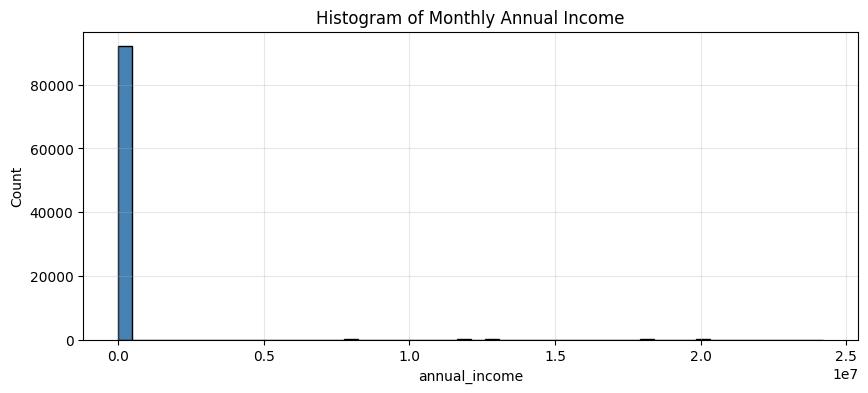

In [129]:
display_hist("annual_income", "Histogram of Monthly Annual Income")

In [130]:
median = df["annual_income"].median()
upper = df["annual_income"].quantile(0.99)
df["annual_income"] = np.where(df["annual_income"] > upper, upper, df["annual_income"])
df["annual_income"] = df["annual_income"].fillna(median)

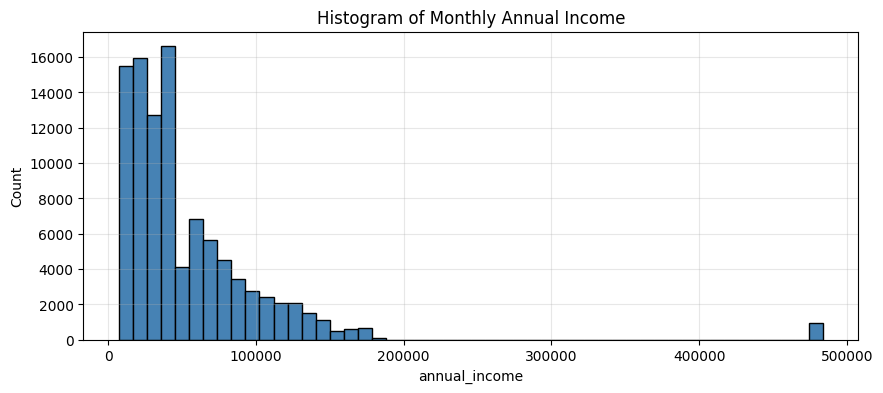

In [131]:
display_hist("annual_income", "Histogram of Monthly Annual Income")

### Replace impossible values (negative, huge) for other columns

In [152]:
for col in ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'interest_rate']:
    df.loc[(df[col] < 0) | (df[col] > 25), col] = pd.NA

### Replace NA in the column `monthly_inhand_salary`

In [133]:
df["monthly_inhand_salary"].describe()

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: monthly_inhand_salary, dtype: float64

You should cap at the 99th percentile if:

- std / mean > 0.5 (large spread)
- max ≫ 75% (e.g., >3× higher)
- histogram shows a long right tail

In [134]:
print(3183 / 4194)
print(15204 / 100 * 75)

0.7589413447782547
11403.0


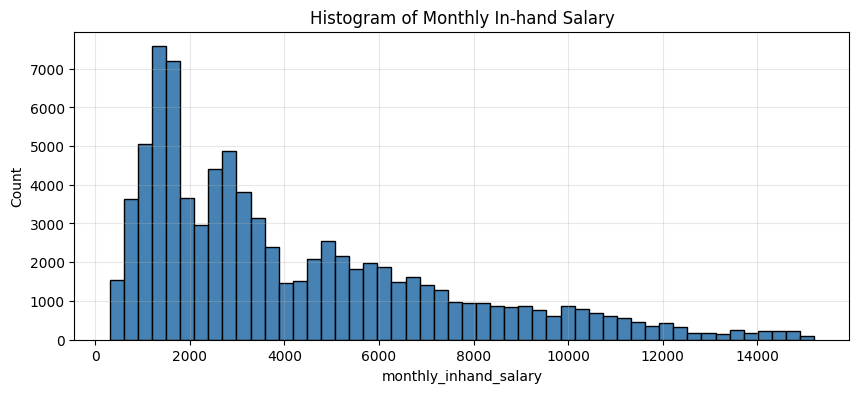

In [135]:
display_hist("monthly_inhand_salary", "Histogram of Monthly In-hand Salary")

In [136]:
upper = df["monthly_inhand_salary"].quantile(0.99)
upper

np.float64(13814.93)

In [137]:
df["monthly_inhand_salary"] = np.where(
    df["monthly_inhand_salary"] > upper, upper, df["monthly_inhand_salary"]
)

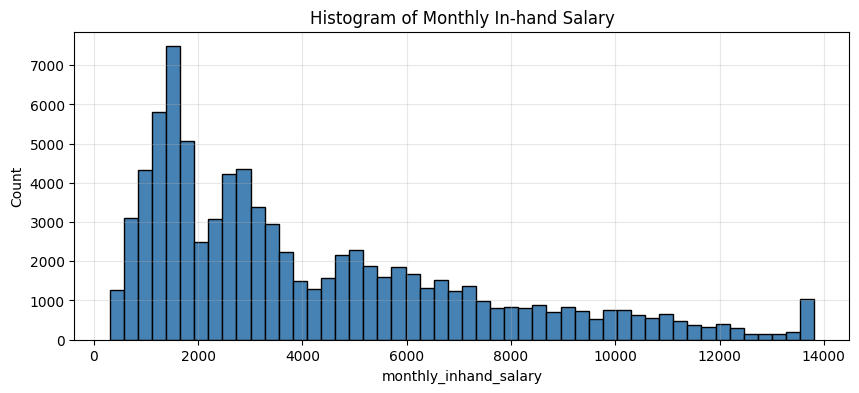

In [138]:
display_hist("monthly_inhand_salary", "Histogram of Monthly In-hand Salary")

Use **median** to replace `NaN.

Reason:

* `monthly_inhand_salary` is **right-skewed** (mean = 4194, std = 3183, max = 15204).
* **Median** is robust to outliers; mean is not.

Rule:

* Use **median** when data are skewed or contain outliers.
* Use **mean** only when distribution is roughly symmetric.


In [139]:
median = df["monthly_inhand_salary"].median()
median

np.float64(3093.745000000001)

In [140]:
df["monthly_inhand_salary"] = df["monthly_inhand_salary"].fillna(median)

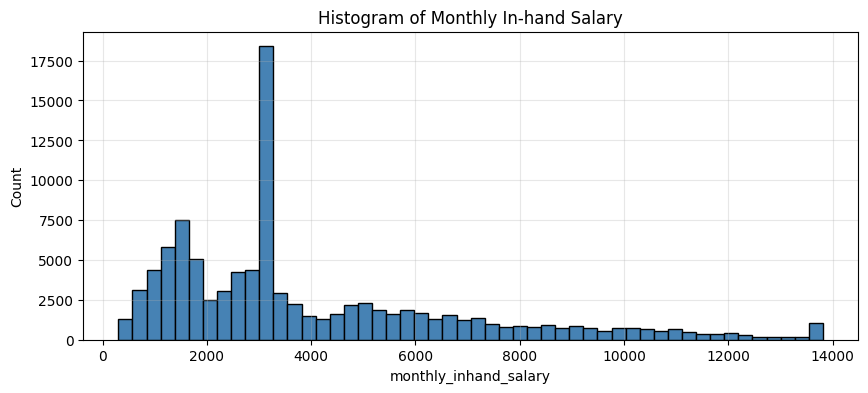

In [141]:
display_hist("monthly_inhand_salary", "Histogram of Monthly In-hand Salary")

In [142]:
df["monthly_inhand_salary"].describe()

count    100000.000000
mean       4023.638416
std        2942.531175
min         303.645417
25%        1792.084167
50%        3093.745000
75%        5371.525000
max       13814.930000
Name: monthly_inhand_salary, dtype: float64

### Replace impossible values (negative, huge) for `num_of_delayed_payment` column

In [143]:
df["num_of_delayed_payment"].describe()

count    89632.000000
mean        31.259863
std        227.725486
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: num_of_delayed_payment, dtype: float64

In [144]:
df.loc[df["num_of_delayed_payment"] < 0, "num_of_delayed_payment"] = np.nan

median = df["num_of_delayed_payment"].median()
upper = df["num_of_delayed_payment"].quantile(0.99)
df["num_of_delayed_payment"] = np.where(df["num_of_delayed_payment"] > upper, upper, df["num_of_delayed_payment"])
df["num_of_delayed_payment"] = df["num_of_delayed_payment"].fillna(median)

In [145]:
df["num_of_delayed_payment"].describe()

count    100000.000000
mean         13.580230
std           5.962662
min           0.000000
25%          10.000000
50%          14.000000
75%          18.000000
max          27.000000
Name: num_of_delayed_payment, dtype: float64

In [150]:
with io.capture_output() as captured:
    print_column_unique_values()

captured_output_text = captured.stdout
captured_output_text

"Column Name: month, Unique count: 8\n<StringArray>\n['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']\nLength: 8, dtype: string\n--------------------\nColumn Name: age, Unique count: 40\n[23. 18. 33. 28. 34. 54. 55. 21. 31. 70. 30. 24. 44. 45. 40. 41. 32. 35.\n 36. 39. 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 27. 25. 47. 53. 56. 29.\n 49. 51. 50. 52.]\n--------------------\nColumn Name: occupation, Unique count: 16\n<StringArray>\n[    'Scientist',       'Unknown',       'Teacher',      'Engineer',\n  'Entrepreneur',     'Developer',        'Lawyer', 'Media_Manager',\n        'Doctor',    'Journalist',       'Manager',    'Accountant',\n      'Musician',      'Mechanic',        'Writer',     'Architect']\nLength: 16, dtype: string\n--------------------\nColumn Name: annual_income, Unique count: 12507\n[19114.12 34847.84 37550.74 ... 37188.1  20002.88 39628.99]\n--------------------\nColumn Name: monthly_inhand_salary, Unique count: 13103\n[1824.84333333 3093.74

In [151]:
with io.capture_output() as captured:
    for col in df.columns:
        print(f"Column Name: {col}, Unique count: {df[col].nunique()}")
        print(df[col].describe())
        print("-" * 20)

captured_output_text = captured.stdout
captured_output_text

'Column Name: month, Unique count: 8\ncount      100000\nunique          8\ntop       January\nfreq        12500\nName: month, dtype: object\n--------------------\nColumn Name: age, Unique count: 40\ncount    100000.000000\nmean         33.958700\nstd          11.346718\nmin          18.000000\n25%          25.000000\n50%          33.000000\n75%          42.000000\nmax          70.000000\nName: age, dtype: float64\n--------------------\nColumn Name: occupation, Unique count: 16\ncount      100000\nunique         16\ntop       Unknown\nfreq         7062\nName: occupation, dtype: object\n--------------------\nColumn Name: annual_income, Unique count: 12507\ncount    100000.000000\nmean      53655.449822\nstd       55828.629917\nmin        7005.930000\n25%       20062.860000\n50%       37550.740000\n75%       70064.920000\nmax      483847.780000\nName: annual_income, dtype: float64\n--------------------\nColumn Name: monthly_inhand_salary, Unique count: 13103\ncount    100000.000000\nmean

In [147]:
cols = list(df.columns)
if "row_id" in cols:
    cols = ["row_id"] + [c for c in cols if c != "row_id"]

In [148]:
df.to_csv("train.csv", index=False, columns=cols)